In [4]:
import sys 
sys.path.append('../src')
from feature_base import load_datasets
import glob
FEATURE_FOLDER = '../features'

feats = glob.glob(FEATURE_FOLDER+'/**.pkl')
data = load_datasets(feats)
data.head()

,moving_average_15,moving_std_15,volume_moving_average_15,RSI_15,moving_average_60,moving_std_60,volume_moving_average_60,RSI_60,close_div_ma_60,high_low_div,...,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,158.306000,NaN,1.282200,NaN,39.576500,NaN,0.320550,NaN,60.0,1.017971,...,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,0.568667,NaN,5.225333,NaN,0.142167,NaN,1.306333,NaN,60.0,1.000000,...,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,923.345067,NaN,2.103337,NaN,230.836267,NaN,0.525834,NaN,60.0,1.025442,...,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,0.510507,NaN,441.780891,NaN,0.127627,NaN,110.445223,NaN,60.0,1.000379,...,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1.725133,NaN,8.072487,NaN,0.431283,NaN,2.018122,NaN,60.0,1.001778,...,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [28]:
data.raw_market_return_causal

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
24236801    0.000036
24236802    0.000064
24236803    0.000027
24236804    0.000044
24236805    0.000017
Name: raw_market_return_causal, Length: 24236806, dtype: float64

In [26]:
import numpy as np
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n


In [32]:
data.groupby('Asset_ID').raw_market_return_causal.transform(lambda x: x.rolling(60, 1).mean())

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
24236801    0.000045
24236802    0.000040
24236803    0.000048
24236804    0.000037
24236805    0.000035
Name: raw_market_return_causal, Length: 24236806, dtype: float64

In [31]:
data.groupby('Asset_ID').raw_market_return_causal.transform(lambda x: moving_average(x.fillna(0).values, 60))


0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
              ...   
24236801    0.000045
24236802    0.000040
24236803    0.000048
24236804    0.000037
24236805    0.000035
Name: raw_market_return_causal, Length: 24236806, dtype: float64

In [11]:
na = data.isna().sum()
na[na == data.shape[0]]

beta_causal    24236806
dtype: int64

In [3]:
data = data.dropna(how="any")
data.shape

(0, 41)

<AxesSubplot:>

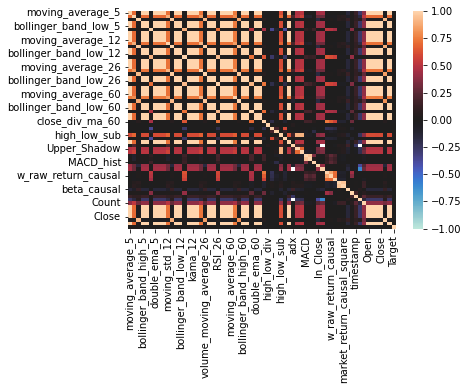

In [2]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0)


In [3]:
corr.head()

,moving_average_5,moving_std_5,volume_moving_average_5,bollinger_band_high_5,bollinger_band_low_5,RSI_5,double_ema_5,kama_5,moving_average_12,moving_std_12,...,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
moving_average_5,1.000000,0.700811,-0.029874,0.999998,0.999998,0.001490,0.999999,1.000000,0.999999,0.723260,...,0.139620,-0.269213,0.397461,0.999999,0.999996,0.999997,0.999999,-0.027983,0.999999,-0.001064
moving_std_5,0.700811,1.000000,-0.021284,0.702124,0.699491,-0.001896,0.700821,0.700806,0.700962,0.886626,...,0.100677,-0.176115,0.517299,0.700799,0.701440,0.700070,0.700797,-0.019935,0.700788,-0.001066
volume_moving_average_5,-0.029874,-0.021284,1.000000,-0.029875,-0.029873,0.002507,-0.029874,-0.029874,-0.029874,-0.021895,...,0.097186,0.063225,0.297316,-0.029874,-0.029902,-0.029856,-0.029874,0.924802,-0.029874,0.010063
bollinger_band_high_5,0.999998,0.702124,-0.029875,1.000000,0.999993,0.001482,0.999998,0.999998,0.999997,0.724239,...,0.139627,-0.269180,0.398077,0.999998,0.999996,0.999993,0.999997,-0.027983,0.999998,-0.001065
bollinger_band_low_5,0.999998,0.699491,-0.029873,0.999993,1.000000,0.001497,0.999998,0.999998,0.999997,0.722274,...,0.139612,-0.269245,0.396842,0.999998,0.999993,0.999997,0.999997,-0.027982,0.999998,-0.001063


In [4]:
corr[["Target"]].style.background_gradient(cmap = "bwr", vmin = -0.1, vmax = 0.1, axis = None)

,Target
moving_average_5,-0.001064
moving_std_5,-0.001066
volume_moving_average_5,0.010063
bollinger_band_high_5,-0.001065
bollinger_band_low_5,-0.001063
RSI_5,-0.001296
double_ema_5,-0.001065
kama_5,-0.001063
moving_average_12,-0.001063
moving_std_12,-0.001160
